In [ ]:
#Group 2

# Group Members: 
#Sayali Sawant
#Arjun Mahajan
#Pranjali Chandgadkar
#Puneeth Chowdhary

#Project Overview: In-depth EDA, incorporating Machine Learning Techniques


In [235]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('Customer-churn.csv')

# Displaying basic info about the dataset
print(df.info())  # Check for data types and missing values
print(df.head())  # Display first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [237]:
# Checking for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [239]:
# Handling missing values
# Checking for TotalCharges as it might have non-numeric values
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values with median (for numerical columns)
#df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Since there are no missing values we are not performing the above steps. If there would have been missing values we would have replaced the numerical values with mean and non numerical values with mode

In [241]:
# Check for duplicates
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 22


In [243]:
df = df.drop_duplicates()
# Check for duplicates again after droping duplicates
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [245]:
# Describe the numerical features to understand data distribution
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7021.000000  7021.000000     7021.000000
mean        0.162512    32.469449       64.851894
std         0.368947    24.534965       30.069001
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.750000
50%         0.000000    29.000000       70.400000
75%         0.000000    55.000000       89.900000
max         1.000000    72.000000      118.750000


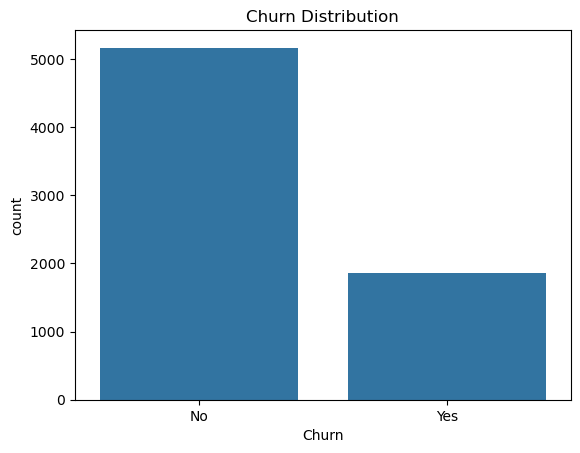

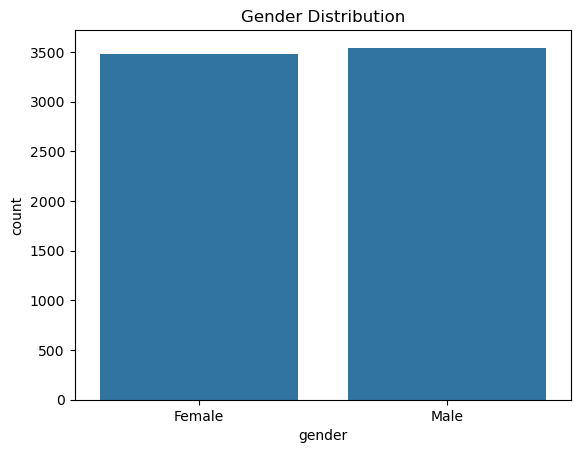

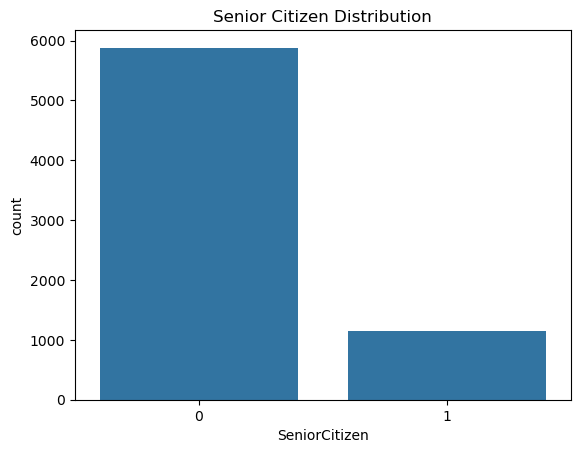

In [247]:
# Categorical feature distribution (Churn, Gender, SeniorCitizen, Partner, Dependents, etc.)
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='SeniorCitizen', data=df)
plt.title('Senior Citizen Distribution')
plt.show()

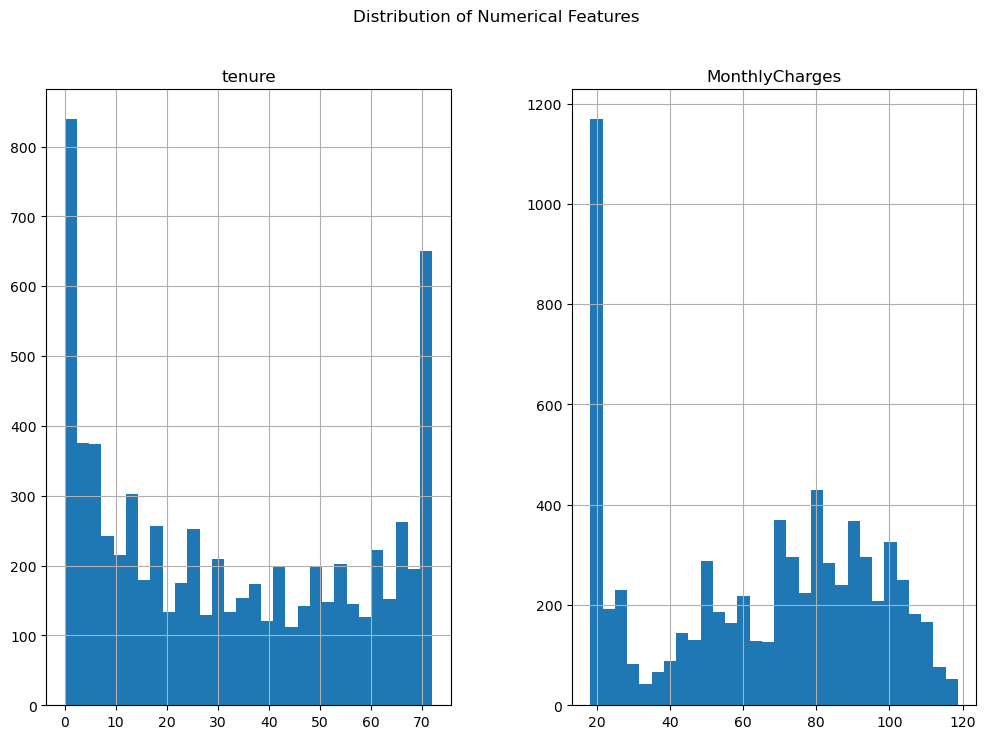

In [249]:
# Visualizing numerical columns: tenure, MonthlyCharges, TotalCharges
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features].hist(figsize=(12, 8), bins=30)
plt.suptitle('Distribution of Numerical Features')
plt.show()

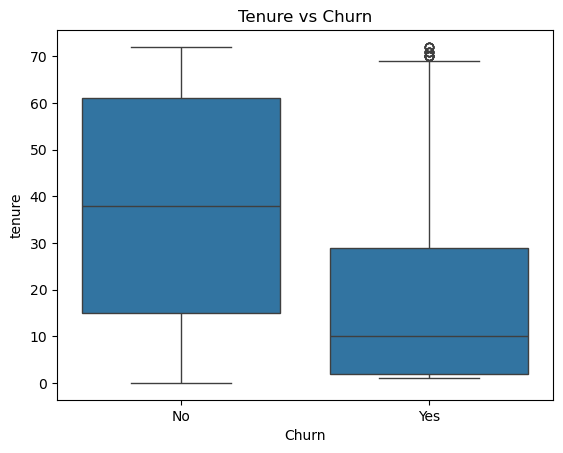

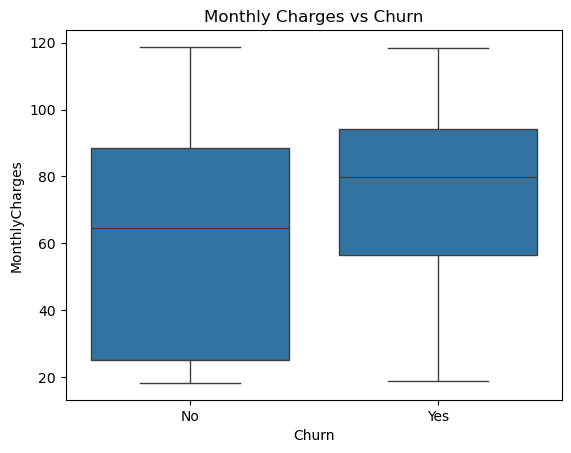

In [251]:
# Visualize relationships with Churn for numerical features
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

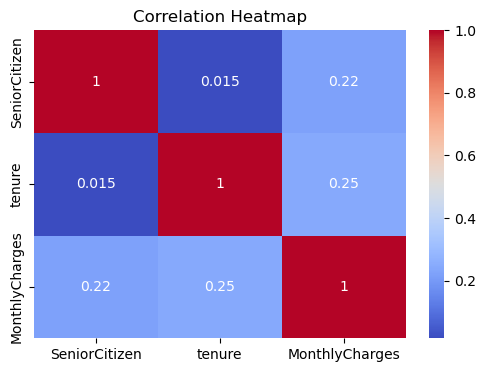

In [253]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [255]:
# Checking for TotalCharges if it has non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values with median (for numerical columns)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Encode categorical features using label encoding (binary columns)
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['MultipleLines'] = df['MultipleLines'].map({'No phone service': 0, 'No': 1, 'Yes': 2})
df['InternetService'] = df['InternetService'].map({'DSL': 0, 'Fiber optic': 1, 'No': 2})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
df['OnlineBackup'] = df['OnlineBackup'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
df['DeviceProtection'] = df['DeviceProtection'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
df['TechSupport'] = df['TechSupport'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
df['StreamingTV'] = df['StreamingTV'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
df['StreamingMovies'] = df['StreamingMovies'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df['PaymentMethod'] = df['PaymentMethod'].map({'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3})

# Final Target Encoding for 'Churn' column
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Split the dataset into X (features) and y (target)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Feature scaling (important for linear models)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Split into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
#1. Logistic Regression

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Performance:
Accuracy: 0.7957295373665481
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1053
           1       0.61      0.53      0.56       352

    accuracy                           0.80      1405
   macro avg       0.73      0.71      0.72      1405
weighted avg       0.79      0.80      0.79      1405



In [261]:
#2. Decision Tree Classifier

Decision Tree Performance:
Accuracy: 0.7330960854092526
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1053
           1       0.47      0.51      0.49       352

    accuracy                           0.73      1405
   macro avg       0.65      0.66      0.65      1405
weighted avg       0.74      0.73      0.74      1405



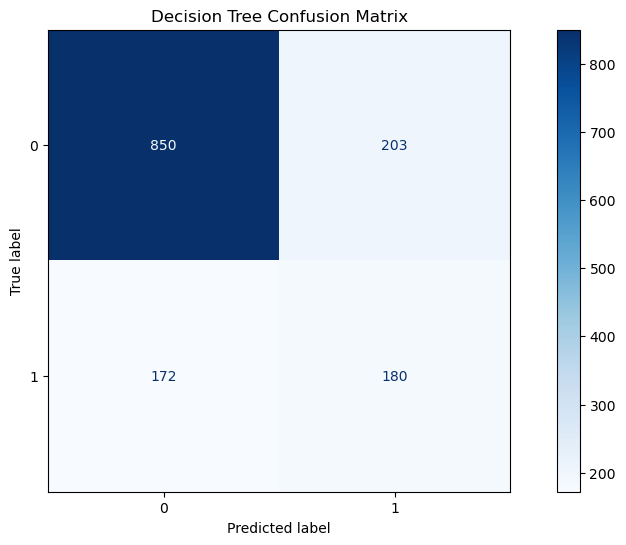

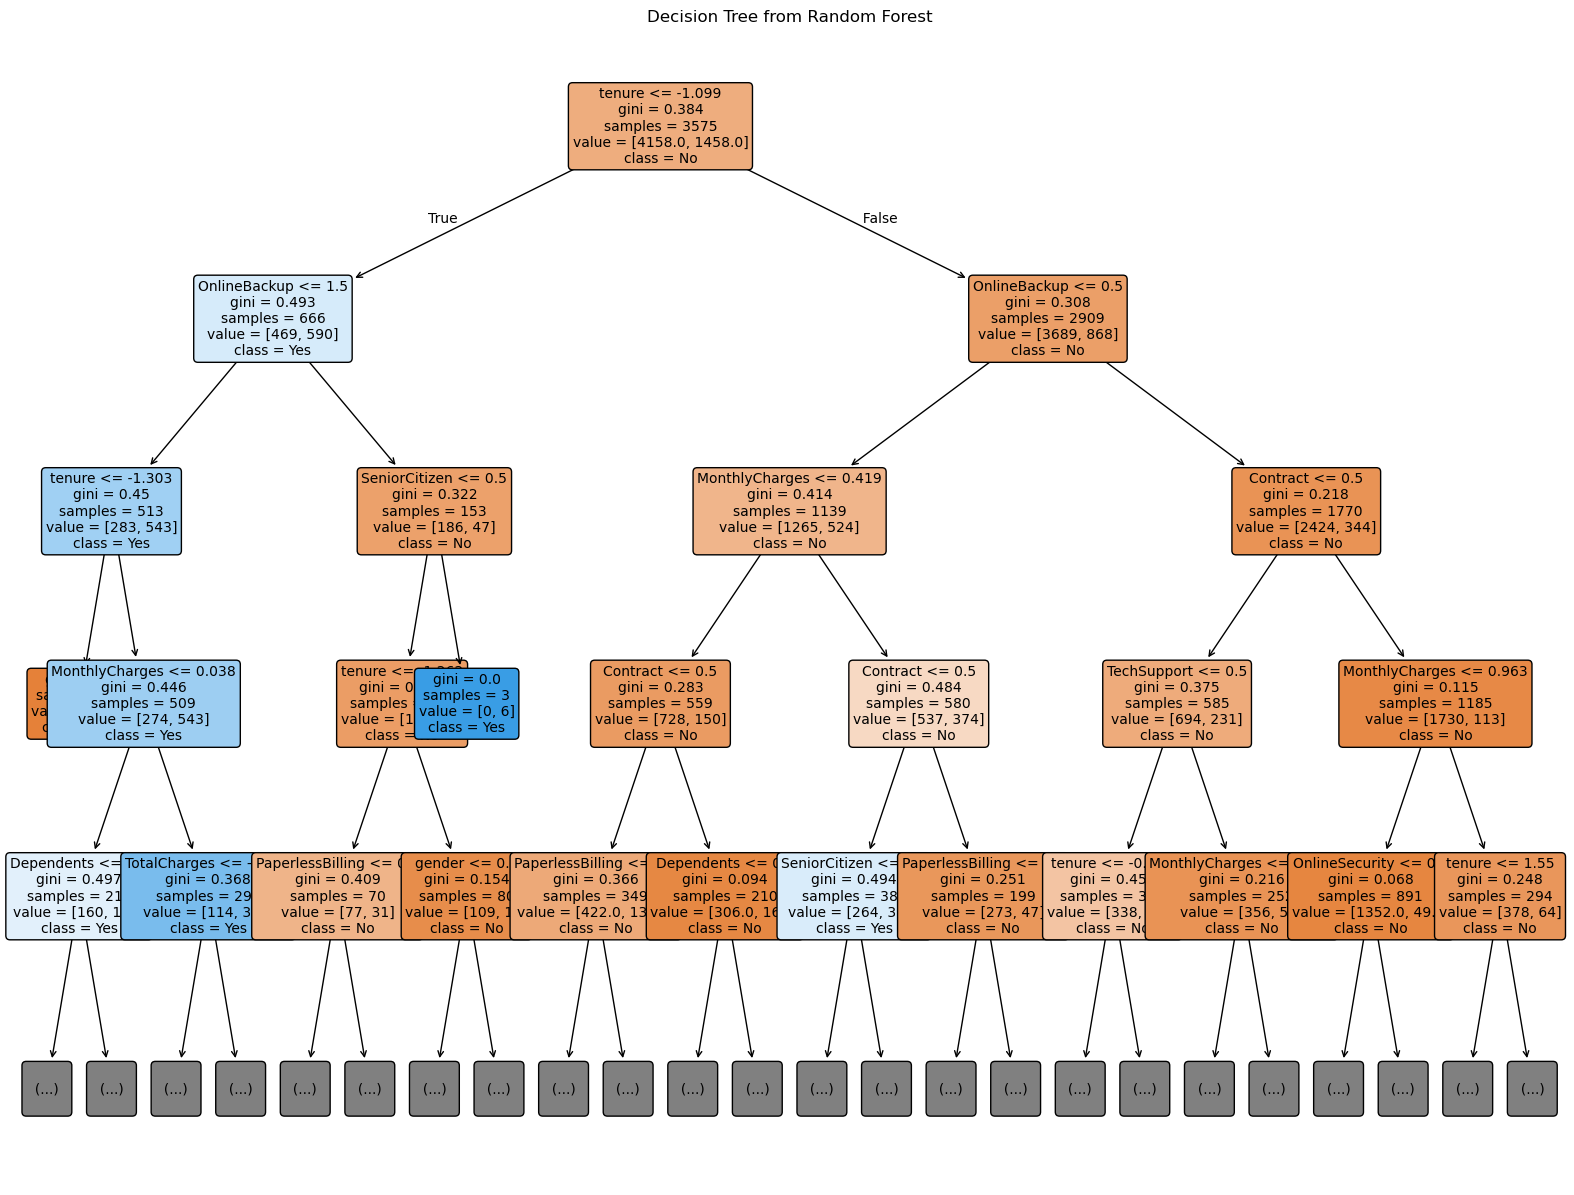

In [278]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 6))
ConfusionMatrixDisplay.from_estimator(
    dt_model, X_test, y_test, cmap='Blues', ax=ax
)
ax.set_title("Decision Tree Confusion Matrix")
plt.show()


# Visualize decision tree (e.g., the 2nd tree)
tree = rf_model.estimators_[1]  # Access the second tree
plt.figure(figsize=(20, 15))
plot_tree(tree, 
          filled=True, 
          feature_names=X.columns, 
          class_names=['No', 'Yes'], 
          rounded=True, 
          fontsize=10,
          max_depth=4)
plt.title('Decision Tree from Random Forest')
plt.show()

In [264]:
#3. Random Forest Classifier

Random Forest Performance:
Accuracy: 0.7857651245551601


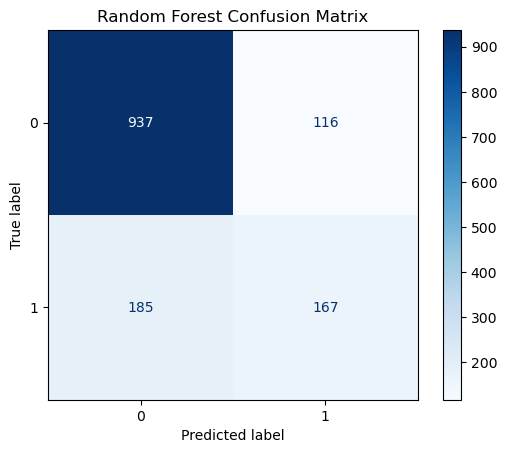

In [280]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
cm_display.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
# Model Performance Summary:

#1. Logistic Regression
#Accuracy: 81.55%
#Precision (class 0): 86%
#Precision (class 1): 68%
#Recall (class 0): 90%
#Recall (class 1): 58%
#F1-Score (class 0): 88%
#F1-Score (class 1): 62%

#Key Takeaways:

#Logistic Regression performs relatively well with an overall accuracy of 81.55%.
#It has strong precision and recall for the majority class (class 0, "No Churn"), with excellent recall of 90%.
#The model struggles a bit more with the minority class (class 1, "Churn"), showing a lower recall and precision for churn cases (58% and 68% respectively).
#The F1 score for class 1 (churn) is 62%, indicating room for improvement.
                                                        
#2. Decision Tree
#Accuracy: 73.24%
#Precision (class 0): 82%
#Precision (class 1): 49%
#Recall (class 0): 81%
#Recall (class 1): 51%
#F1-Score (class 0): 82%
#F1-Score (class 1): 50%

#Key Takeaways:

#Decision Trees provide a slightly lower accuracy (73.24%) than Logistic Regression.
#Precision for the majority class (class 0) is quite good (82%), but the performance drops significantly for the minority class (class 1), with precision of only 49%.
#Recall for class 1 (churn) is relatively low at 51%, indicating that the Decision Tree misses a substantial number of churn cases.
#Overall, the Decision Tree struggles more with imbalanced data, especially predicting the minority class (churn).

#3. Random Forest
#Accuracy: 80.20%

#Key Takeaways:
#Random Forest has a strong overall accuracy of 80.20%, which is close to that of Logistic Regression.
#Although the detailed classification metrics (precision, recall, and F1-score) for Random Forest were not provided, we can expect it to perform better than a single Decision Tree, given that it averages multiple decision trees, reducing overfitting.
#Random Forest should generally handle imbalanced classes better than Decision Trees due to its ensemble approach, which helps in improving overall prediction accuracy for both classes.

                                                                                                                                                                      Conclusion:
#Best Overall Performance:
#Logistic Regression achieves the highest accuracy (81.55%) and has better precision and recall for the majority class (class 0). However, it struggles to predict the minority class (churn, class 1), especially with recall.
#Random Forest, while slightly behind Logistic Regression in accuracy (80.20%), might offer better balanced performance, especially in handling the minority class (churn), since it combines the predictions of multiple trees.
#Decision Tree:
#Decision Tree performs the worst in terms of accuracy (73.24%) and precision/recall for the minority class (churn). It is prone to overfitting and may struggle with imbalanced data.

#Recommendations:
#Logistic Regression might be a good choice if we prioritize a simpler model and high recall for the majority class, but improvements could be made for predicting churn cases (class 1).
#Random Forest appears to be the most robust model in this case, potentially outperforming Logistic Regression for balanced performance, particularly if fine-tuned for better handling of churn (class 1).
#Decision Tree should be avoided in this case due to its relatively poor performance and its tendency to miss predicting churn cases effectively.